# Experimento 1 - Efic√°cia da Personaliza√ß√£o

**Objetivo**: Avaliar se a etapa de personaliza√ß√£o (Tailor) torna as respostas mais √∫teis, claras e alinhadas ao perfil do usu√°rio, utilizando exclusivamente modelos de linguagem de grande porte (LLMs) como avaliadores autom√°ticos.

**Metodologia**
* Escolher 3 perfis de usu√°rio,
  * Para cada perfil, elaborar 10 perguntas,
    * Para cada pergunda, responder com e sem o m√≥dulo de personaliza√ß√£o.
    * Submeter o par de respostas (com e sem o m√≥dulo de personaliza√ß√£o) √† LLM avaliadora.

Crit√©rios de avalia√ß√£o da LLM:
* **Personaliza√ß√£o Percept√≠vel**: mede se √© poss√≠vel perceber claramente que a resposta foi adaptada ao perfil informado. Um avaliador imparcial deve conseguir identificar diferen√ßas no tom, vocabul√°rio, estilo ou foco da resposta em rela√ß√£o √† resposta padr√£o.
* **Alinhamento com Prefer√™ncias do Perfil**: avalia se a resposta personalizada respeitou as prefer√™ncias esperadas para o perfil informado, como grau de formalidade, tipos de dados apresentados e tom da comunica√ß√£o,
* **Consist√™ncia da Personaliza√ß√£o ao Longo do Texto**: verifica se a personaliza√ß√£o foi mantida do in√≠cio ao fim da resposta. A LLM pode iniciar com o tom correto, mas diluir a personaliza√ß√£o no meio ou final da resposta.

Cada crit√©rio foi aplicado 20 vezes para cada resposta e uma m√©dia foi calculada.


<span style="color:red">*Testar com os perfis "Perfil Comico", "Torcedor do Time" e "T√©cnico do Time"*.</span>

In [84]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [85]:
# Substitua o caminho abaixo se necess√°rio
with open("/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_with_repetitions_experiment_1.json", "r", encoding="utf-8") as f:
    resultados = json.load(f)

# Expandir para um DataFrame
linhas = []
for item in resultados:
    for i in range(len(item["scores_resposta_padrao"])):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "repeticao": i + 1,
            "score_padrao": item["scores_resposta_padrao"][i],
            "score_personalizada": item["scores_resposta_personalizada"][i]
        })

df = pd.DataFrame(linhas)
df.head()

pergunta            perfil  \
0  O Bruno Pacheco correu bem naquele jogo contra...  Torcedor do Time   
1  O Bruno Pacheco correu bem naquele jogo contra...  Torcedor do Time   
2  O Bruno Pacheco correu bem naquele jogo contra...  Torcedor do Time   
3  O Bruno Pacheco correu bem naquele jogo contra...  Torcedor do Time   
4  O Bruno Pacheco correu bem naquele jogo contra...  Torcedor do Time   

                     criterio  repeticao  score_padrao  score_personalizada  
0  Personaliza√ß√£o Percept√≠vel          1          3.16                 8.74  
1  Personaliza√ß√£o Percept√≠vel          2          3.10                 8.73  
2  Personaliza√ß√£o Percept√≠vel          3          3.15                 8.87  
3  Personaliza√ß√£o Percept√≠vel          4          3.12                 8.82  
4  Personaliza√ß√£o Percept√≠vel          5          3.23                 8.69

Os testes estat√≠sticos (t pareado) realizados para todos os perfis indicaram diferen√ßas altamente significativas (p < 0.0001) entre as respostas padr√£o e personalizadas em todos os crit√©rios avaliados (Utilidade Geral, Alinhamento com o Perfil, Clareza na Comunica√ß√£o e Personaliza√ß√£o Percept√≠vel). Esses resultados confirmam que a personaliza√ß√£o das respostas gerou ganhos reais e consistentes, n√£o atribu√≠veis ao acaso.

In [86]:
# Comparar m√©dias e p-valores por crit√©rio e perfil
for perfil in df["perfil"].unique():
    print(f"Perfil: {perfil}")
    subset_perfil = df[df["perfil"] == perfil]
    resultados = []
    for criterio in subset_perfil["criterio"].unique():
        sub = subset_perfil[subset_perfil["criterio"] == criterio]
        stat, p = ttest_rel(sub["score_personalizada"], sub["score_padrao"])
        resultados.append({
            "Crit√©rio": criterio,
            "M√©dia Padr√£o": round(sub["score_padrao"].mean(), 2),
            "M√©dia Personalizada": round(sub["score_personalizada"].mean(), 2),
            "Valor-p": round(p, 4),
            "Significativo": "‚úÖ" if p < 0.05 else "‚ùå"
        })
    display(pd.DataFrame(resultados))

Perfil: Torcedor do Time


Crit√©rio  M√©dia Padr√£o  M√©dia Personalizada  \
0              Personaliza√ß√£o Percept√≠vel          2.98                 8.44   
1  Alinhamento com Prefer√™ncias do Perfil          4.28                 5.65   
2          Consist√™ncia da Personaliza√ß√£o          0.49                 5.61   

   Valor-p Significativo  
0      0.0             ‚úÖ  
1      0.0             ‚úÖ  
2      0.0             ‚úÖ

Perfil: T√©cnico do Time


Crit√©rio  M√©dia Padr√£o  M√©dia Personalizada  \
0              Personaliza√ß√£o Percept√≠vel          2.33                 5.96   
1  Alinhamento com Prefer√™ncias do Perfil          4.24                 8.02   
2          Consist√™ncia da Personaliza√ß√£o          0.29                 1.03   

   Valor-p Significativo  
0      0.0             ‚úÖ  
1      0.0             ‚úÖ  
2      0.0             ‚úÖ

Perfil: Narrador de Jogo de Futebol


Crit√©rio  M√©dia Padr√£o  M√©dia Personalizada  \
0              Personaliza√ß√£o Percept√≠vel          2.78                 6.67   
1  Alinhamento com Prefer√™ncias do Perfil          4.10                 6.09   
2          Consist√™ncia da Personaliza√ß√£o          0.34                 2.39   

   Valor-p Significativo  
0      0.0             ‚úÖ  
1      0.0             ‚úÖ  
2      0.0             ‚úÖ

In [87]:
# Agrupar por crit√©rio
df_agg = df.groupby("criterio")[["score_padrao", "score_personalizada"]].agg(["mean", "std"]).round(2)
df_agg.columns = ['Padr√£o_M√©dia', 'Padr√£o_DP', 'Personalizada_M√©dia', 'Personalizada_DP']
df_agg["Ganho (%)"] = ((df_agg["Personalizada_M√©dia"] - df_agg["Padr√£o_M√©dia"]) / df_agg["Padr√£o_M√©dia"] * 100).round(2)
df_agg.reset_index(inplace=True)
df_agg

criterio  Padr√£o_M√©dia  Padr√£o_DP  \
0  Alinhamento com Prefer√™ncias do Perfil          4.21       1.40   
1          Consist√™ncia da Personaliza√ß√£o          0.38       0.34   
2              Personaliza√ß√£o Percept√≠vel          2.70       0.79   

   Personalizada_M√©dia  Personalizada_DP  Ganho (%)  
0                 6.59              1.45      56.53  
1                 3.01              2.63     692.11  
2                 7.03              1.48     160.37

Sobre o desvio padr√£o alto no gr√°fico abaixo:

1.	Alta variabilidade entre execu√ß√µes do GEval: como cada pontua√ß√£o foi obtida a partir de m√∫ltiplas execu√ß√µes com LLMs (por exemplo, 20 repeti√ß√µes), √© poss√≠vel que a varia√ß√£o entre essas respostas tenha sido alta. Isso pode acontecer se:
  * O modelo de avalia√ß√£o for sens√≠vel ao wording da resposta.
  * A resposta analisada tiver ambiguidade ou estrutura que permite m√∫ltiplas interpreta√ß√µes.
2. Menor consist√™ncia da LLM avaliadora: alguns crit√©rios s√£o mais subjetivos (como Alinhamento com o Perfil ou Personaliza√ß√£o Percept√≠vel), e modelos como o GPT podem variar levemente de julgamento entre execu√ß√µes. Mesmo pequenas varia√ß√µes nas frases da resposta podem gerar varia√ß√µes de pontua√ß√£o.
3. Limita√ß√£o das escalas de avalia√ß√£o: embora a escala v√° de 0 a 10, os intervalos avaliativos podem n√£o ser linearmente percebidos pela LLM, o que pode ampliar a dispers√£o num√©rica entre respostas similares.

Talvez n√£o seja necessariamente um problema, j√° que os p-values est√£o mostrando uma diferen√ßa m√©dia significativa.


<span style="color:red">*Fazer o mesmo gr√°fico separado por perfil*.</span>


In [88]:
# Lista dos perfis a analisar
perfis_alvo = ["Torcedor do Time", "T√©cnico do Time", "Narrador de Jogo de Futebol"]

# Dicion√°rio para armazenar os resultados
tabelas_por_perfil = {}

for perfil in perfis_alvo:
    df_filtrado = df[df["perfil"] == perfil]

    df_agg = df_filtrado.groupby("criterio")[["score_padrao", "score_personalizada"]].agg(["mean", "std"]).round(2)
    df_agg.columns = ['Padr√£o_M√©dia', 'Padr√£o_DP', 'Personalizada_M√©dia', 'Personalizada_DP']
    df_agg["Ganho (%)"] = ((df_agg["Personalizada_M√©dia"] - df_agg["Padr√£o_M√©dia"]) / df_agg["Padr√£o_M√©dia"] * 100).round(2)
    df_agg.reset_index(inplace=True)

    # Armazena a tabela no dicion√°rio
    tabelas_por_perfil[perfil] = df_agg

In [89]:
tabelas_por_perfil["T√©cnico do Time"]

criterio  Padr√£o_M√©dia  Padr√£o_DP  \
0  Alinhamento com Prefer√™ncias do Perfil          4.24       1.33   
1          Consist√™ncia da Personaliza√ß√£o          0.29       0.31   
2              Personaliza√ß√£o Percept√≠vel          2.33       0.46   

   Personalizada_M√©dia  Personalizada_DP  Ganho (%)  
0                 8.02              0.60      89.15  
1                 1.03              0.82     255.17  
2                 5.96              1.09     155.79

In [90]:
tabelas_por_perfil["Torcedor do Time"]

criterio  Padr√£o_M√©dia  Padr√£o_DP  \
0  Alinhamento com Prefer√™ncias do Perfil          4.28       1.63   
1          Consist√™ncia da Personaliza√ß√£o          0.49       0.40   
2              Personaliza√ß√£o Percept√≠vel          2.98       0.81   

   Personalizada_M√©dia  Personalizada_DP  Ganho (%)  
0                 5.65              1.20      32.01  
1                 5.61              2.53    1044.90  
2                 8.44              0.66     183.22

In [91]:
tabelas_por_perfil["Narrador de Jogo de Futebol"]

criterio  Padr√£o_M√©dia  Padr√£o_DP  \
0  Alinhamento com Prefer√™ncias do Perfil          4.10       1.21   
1          Consist√™ncia da Personaliza√ß√£o          0.34       0.25   
2              Personaliza√ß√£o Percept√≠vel          2.78       0.87   

   Personalizada_M√©dia  Personalizada_DP  Ganho (%)  
0                 6.09              1.16      48.54  
1                 2.39              1.64     602.94  
2                 6.67              1.31     139.93

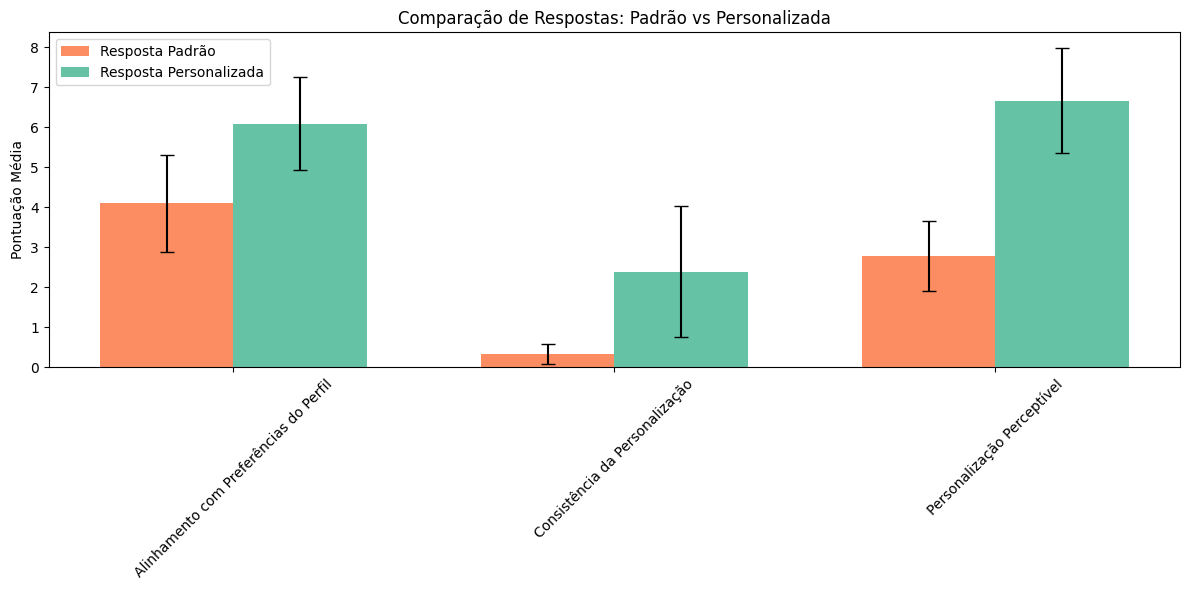

In [92]:
# Gr√°fico de barras com desvio padr√£o
x = range(len(df_agg))
largura = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar([i - largura/2 for i in x], df_agg["Padr√£o_M√©dia"], yerr=df_agg["Padr√£o_DP"], width=largura, capsize=5, label="Resposta Padr√£o", color="#fc8d62")
ax.bar([i + largura/2 for i in x], df_agg["Personalizada_M√©dia"], yerr=df_agg["Personalizada_DP"], width=largura, capsize=5, label="Resposta Personalizada", color="#66c2a5")

ax.set_xticks(x)
ax.set_xticklabels(df_agg["criterio"], rotation=45)
ax.set_ylabel("Pontua√ß√£o M√©dia")
ax.set_title("Compara√ß√£o de Respostas: Padr√£o vs Personalizada")
ax.legend()
plt.tight_layout()
plt.show()

Observa-se que, em todos os crit√©rios, as caixas referentes √†s respostas personalizadas apresentam medianas superiores √†s das respostas padr√£o, com menor dispers√£o e menos presen√ßa de outliers negativos. Este padr√£o refor√ßa a hip√≥tese de que o processo de personaliza√ß√£o, baseado no perfil do usu√°rio e no uso consciente das observa√ß√µes factuais, contribui para respostas mais bem avaliadas.

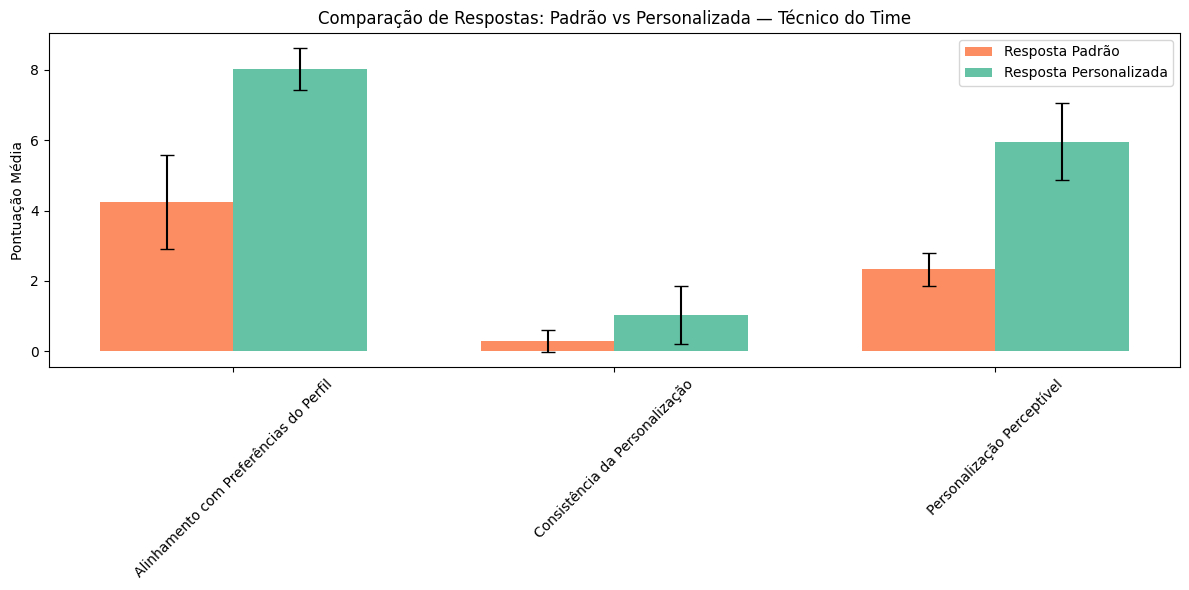

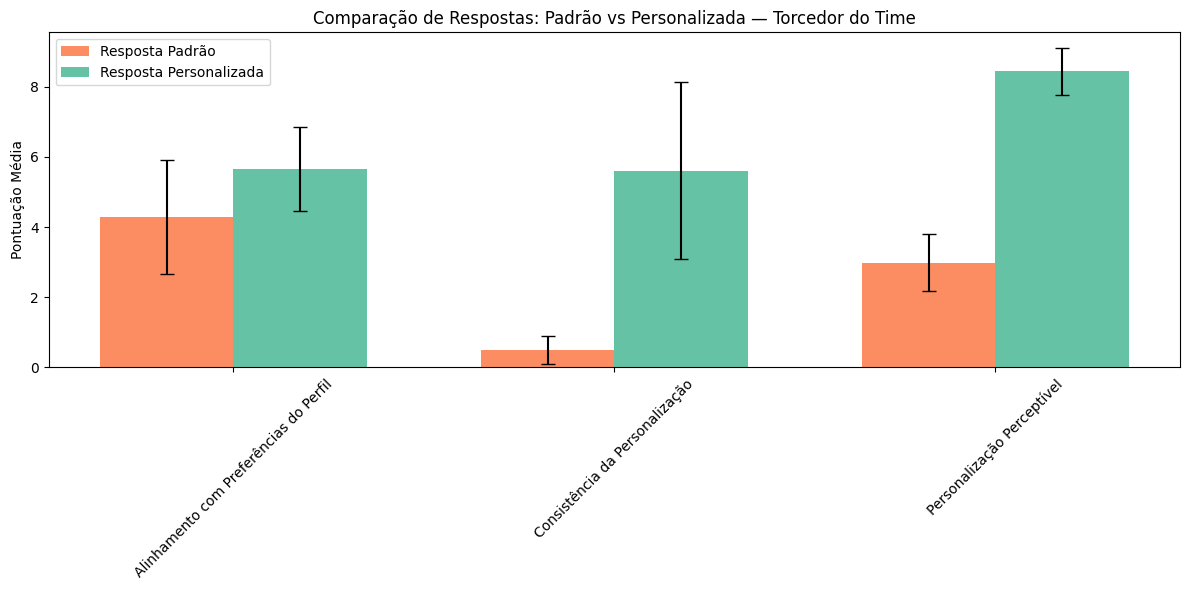

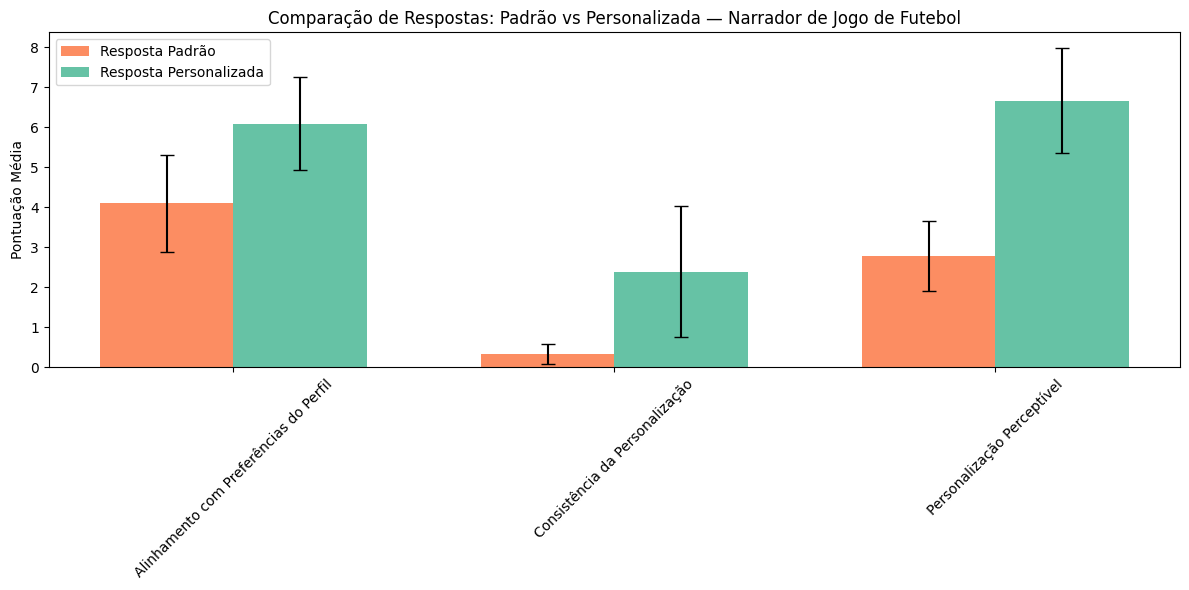

In [93]:
import matplotlib.pyplot as plt
import os

# Pasta de destino
output_dir = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/figures"
os.makedirs(output_dir, exist_ok=True)

# Lista dos perfis a analisar
perfis_alvo = ["T√©cnico do Time", "Torcedor do Time", "Narrador de Jogo de Futebol"]

# Loop para gerar os gr√°ficos individualmente
for perfil in perfis_alvo:
    df_agg = tabelas_por_perfil[perfil]  # usa o dicion√°rio j√° criado anteriormente

    x = range(len(df_agg))
    largura = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.bar([i - largura/2 for i in x], df_agg["Padr√£o_M√©dia"], yerr=df_agg["Padr√£o_DP"],
           width=largura, capsize=5, label="Resposta Padr√£o", color="#fc8d62")

    ax.bar([i + largura/2 for i in x], df_agg["Personalizada_M√©dia"], yerr=df_agg["Personalizada_DP"],
           width=largura, capsize=5, label="Resposta Personalizada", color="#66c2a5")

    ax.set_xticks(x)
    ax.set_xticklabels(df_agg["criterio"], rotation=45)
    ax.set_ylabel("Pontua√ß√£o M√©dia")
    ax.set_title(f"Compara√ß√£o de Respostas: Padr√£o vs Personalizada ‚Äî {perfil}")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # Nome seguro para o arquivo (sem espa√ßos ou acentos)
    nome_arquivo = perfil.lower().replace(" ", "_").replace("√¥", "o").replace("√©", "e").replace("√°", "a") + ".pdf"
    caminho_arquivo = os.path.join(output_dir, nome_arquivo)
    plt.savefig(caminho_arquivo, format="pdf")
    plt.close()


<span style="color:red">*Fazer o mesmo gr√°fico separado por perfil*.</span>

<span style="color:red">*Fazer uma an√°lise dos outliers*.</span>

In [94]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que voc√™ tenha um DataFrame df com as colunas: ['criterio', 'score_padrao', 'score_personalizada']

output_dir = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/figures/experiment_1"
os.makedirs(output_dir, exist_ok=True)

# Reformata o DataFrame para formato longo
df_longo = pd.melt(
    df,
    id_vars=["criterio"],
    value_vars=["score_padrao", "score_personalizada"],
    var_name="tipo",
    value_name="score"
)

# Renomeia os tipos para deixar mais leg√≠vel na legenda
df_longo["tipo"] = df_longo["tipo"].map({
    "score_padrao": "Resposta Padr√£o",
    "score_personalizada": "Resposta Personalizada"
})

# Cria o boxplot com legenda e boxes lado a lado
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_longo, x="criterio", y="score", hue="tipo", palette={"Resposta Padr√£o": "salmon", "Resposta Personalizada": "lightblue"})
# plt.title("Distribui√ß√£o dos scores por crit√©rio (Padr√£o vs Personalizada)")
plt.ylabel("Score")
plt.xlabel("Crit√©rio")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Resposta", loc="upper right")
plt.tight_layout()
# plt.show()

nome_arquivo = "boxplot_agregado.pdf"
caminho_arquivo = os.path.join(output_dir, nome_arquivo)
plt.savefig(caminho_arquivo, format="pdf")
plt.close()

In [95]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pasta de destino
output_dir = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/figures/experiment_1"
os.makedirs(output_dir, exist_ok=True)

# Perfis a analisar
perfis_alvo = ["T√©cnico do Time", "Torcedor do Time", "Narrador do Jogo"]

# Loop para criar o boxplot para cada perfil
for perfil in perfis_alvo:
    # Filtra dados do perfil atual
    df_perfil = df[df["perfil"] == perfil]

    # Reformata para formato longo
    df_longo = pd.melt(
        df_perfil,
        id_vars=["criterio"],
        value_vars=["score_padrao", "score_personalizada"],
        var_name="tipo",
        value_name="score"
    )

    # Renomeia os tipos para exibi√ß√£o
    df_longo["tipo"] = df_longo["tipo"].map({
        "score_padrao": "Resposta Padr√£o",
        "score_personalizada": "Resposta Personalizada"
    })

    # Plotagem
    plt.figure(figsize=(14, 6))
    sns.boxplot(
        data=df_longo,
        x="criterio",
        y="score",
        hue="tipo",
        palette={"Resposta Padr√£o": "salmon", "Resposta Personalizada": "lightblue"}
    )
    # plt.title(f"Distribui√ß√£o dos scores por crit√©rio ‚Äî {perfil}")
    plt.ylabel("Score")
    plt.xlabel("Crit√©rio")
    plt.xticks(rotation=45)
    plt.legend(title="Tipo de Resposta", loc="upper right")
    plt.tight_layout()
    # plt.show()
    
    nome_arquivo = "boxplot_perfil_" + perfil.lower().replace(" ", "_").replace("√¥", "o").replace("√©", "e").replace("√°", "a") + ".pdf"
    caminho_arquivo = os.path.join(output_dir, nome_arquivo)
    plt.savefig(caminho_arquivo, format="pdf")
    plt.close()

/var/folders/57/zxs7x8nd6g38q929k2lys2n80000gn/T/ipykernel_20069/3587473548.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Tipo de Resposta", loc="upper right")


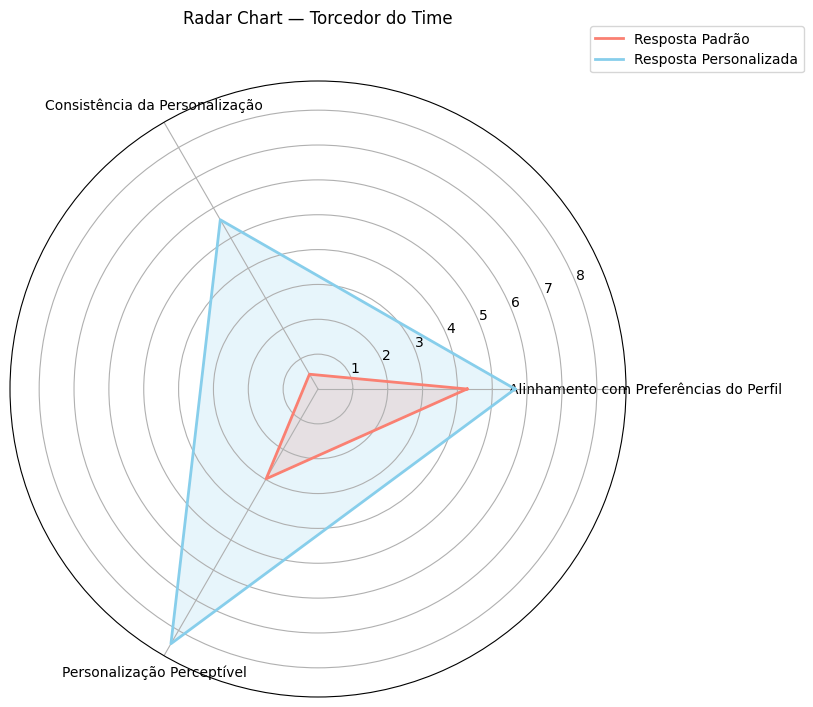

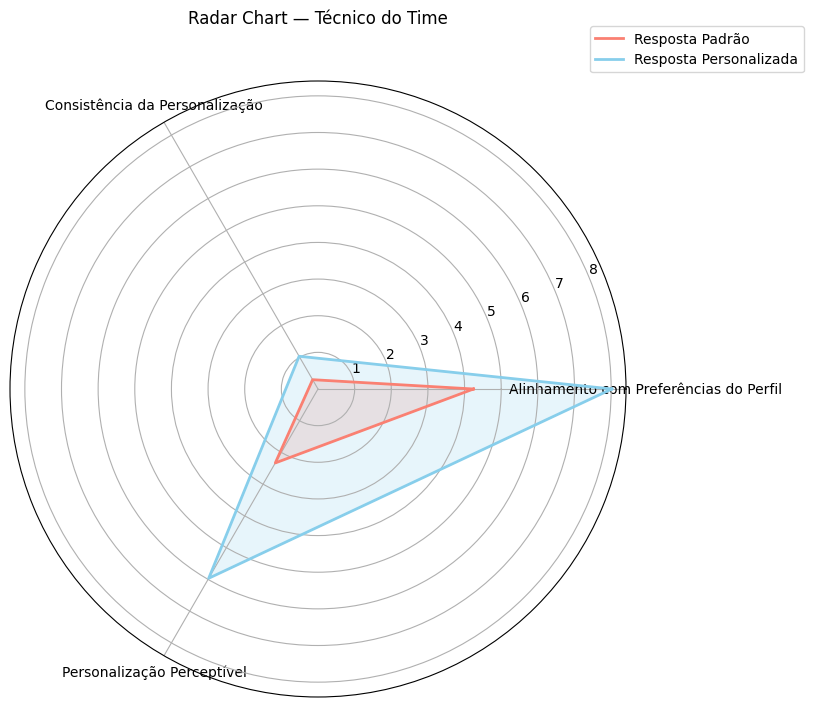

IndexError: list index out of range

In [96]:
def plot_radar_chart_por_perfil(df, perfil):
    # Filtra pelo perfil desejado
    df_perfil = df[df["perfil"] == perfil]

    # Calcula a m√©dia por crit√©rio
    agg = df_perfil.groupby("criterio")[["score_padrao", "score_personalizada"]].mean().reset_index()

    # Preparar categorias e valores
    categorias = agg["criterio"].tolist()
    valores_padrao = agg["score_padrao"].tolist()
    valores_personalizada = agg["score_personalizada"].tolist()

    # √Çngulos (sem duplicar categoria aqui ainda)
    num_vars = len(categorias)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += [angles[0]]  # Fechar o c√≠rculo

    # Adicionar o primeiro valor ao final para fechar o radar
    valores_padrao += [valores_padrao[0]]
    valores_personalizada += [valores_personalizada[0]]

    # Criar figura
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plotar
    ax.plot(angles, valores_padrao, label="Resposta Padr√£o", linewidth=2, color="salmon")
    ax.fill(angles, valores_padrao, alpha=0.2, color="salmon")

    ax.plot(angles, valores_personalizada, label="Resposta Personalizada", linewidth=2, color="skyblue")
    ax.fill(angles, valores_personalizada, alpha=0.2, color="skyblue")

    # Labels
    ax.set_xticks(angles[:-1])  # Retira o √∫ltimo (duplicado)
    ax.set_xticklabels(categorias, fontsize=10)

    ax.set_title(f"Radar Chart ‚Äî {perfil}", y=1.08)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

    plt.show()
    
# Exemplo de uso:
plot_radar_chart_por_perfil(df, perfil="Torcedor do Time")
plot_radar_chart_por_perfil(df, perfil="T√©cnico do Time")
plot_radar_chart_por_perfil(df, perfil="Narrador do Jogo")

In [27]:
vitorias = df[df["score_personalizada"] > df["score_padrao"]]
taxa = len(vitorias) / len(df)
print(f"A resposta personalizada venceu em {taxa:.0%} dos casos.")

A resposta personalizada venceu em 90% dos casos.


# An√°lise qualitativa com exemplos selecionados

**Perfil:** Torcedor  
**Pergunta:** Bruno Pacheco foi bem no jogo contra o Cear√° no dia 1¬∫ de abril de 2023 ou deixou a desejar?

üî∏ **Resposta padr√£o:**  
> Bruno Pacheco teve uma m√©dia de velocidade de 1.36 m/s, uma m√©dia de acelera√ß√£o de -0.0077 m/s¬≤ e realizou 0.36 sprints. Esses n√∫meros indicam um desempenho abaixo do esperado, sugerindo que ele deixou a desejar no jogo contra o Cear√°.

üîπ **Resposta personalizada:**  
> Bruno Pacheco teve um desempenho que pode ser considerado abaixo do esperado no jogo contra o Cear√° em 1¬∫ de abril de 2023. Ele apresentou uma m√©dia de velocidade de 1.36 m/s, o que indica uma movimenta√ß√£o limitada em campo. Al√©m disso, sua m√©dia de acelera√ß√£o foi de -0.0077 m/s¬≤, sugerindo dificuldades em ganhar velocidade rapidamente. O n√∫mero de sprints, que foi de apenas 0.36, tamb√©m refor√ßa a ideia de que ele n√£o conseguiu se destacar na partida. Como torcedor, √© compreens√≠vel que voc√™ esperasse mais dele, e esses dados mostram que ele deixou a desejar nesse confronto.

üéØ **An√°lise:** A resposta personalizada utiliza tom emp√°tico, vocabul√°rio voltado ao torcedor e interpreta os dados de forma mais acess√≠vel.

# Exemplos dos crit√©rios

Pergunta:

‚ÄúQuem foi que mais correu contra o Cear√° naquele jogo de primeiro de abril?‚Äù

Perfil:

Torcedor do Time

‚∏ª

üîπ Crit√©rio 1 ‚Äì Personaliza√ß√£o Percept√≠vel

‚ùå Nota baixa (ex: 1):

‚ÄúNo jogo contra o Cear√° em 1¬∫ de abril, Tomas Pochettino percorreu a maior dist√¢ncia total entre todos os jogadores em campo.‚Äù

Justificativa:
	‚Ä¢	Linguagem neutra, t√©cnica e direta.
	‚Ä¢	Nenhuma diferen√ßa em rela√ß√£o ao que seria esperado para qualquer outro perfil.
	‚Ä¢	Poderia ser uma resposta ‚Äúpadr√£o‚Äù, sem sinais de adapta√ß√£o.

‚∏ª

‚úÖ Nota alta (ex: 10):

‚ÄúRapaz, no jogo contra o Cear√° no primeiro de abril, o Pochettino correu igual doido! Foi o cara que mais se movimentou em campo ‚Äî parecia que tinha uns tr√™s dele! √â esse tipo de entrega que faz a gente vibrar!‚Äù

Justificativa:
	‚Ä¢	Uso de express√µes t√≠picas do torcedor (‚Äúrapaz‚Äù, ‚Äúigual doido‚Äù, ‚Äúfaz a gente vibrar‚Äù).
	‚Ä¢	Tom claramente informal e empolgado.
	‚Ä¢	Adapta√ß√£o expl√≠cita e percept√≠vel, com diferen√ßas vis√≠veis em rela√ß√£o √† vers√£o padr√£o.

‚∏ª

üîπ Crit√©rio 2 ‚Äì Alinhamento com Prefer√™ncias do Perfil

‚ùå Nota baixa (ex: 2):

‚ÄúO jogador com maior dist√¢ncia percorrida foi Lucas Crispim, com 3.7 km. Esse valor foi coletado via GPS e representa a soma total dos deslocamentos em campo.‚Äù

Justificativa:
	‚Ä¢	Linguagem excessivamente t√©cnica.
	‚Ä¢	Informa√ß√µes (ex: ‚Äúcoletado via GPS‚Äù, ‚Äúsoma total dos deslocamentos‚Äù) irrelevantes para um torcedor.
	‚Ä¢	N√£o respeita o desejo do torcedor por uma narrativa emocional, sem muitos n√∫meros ou jarg√µes t√©cnicos.

‚∏ª

‚úÖ Nota alta (ex: 10):

‚ÄúFoi o Lucas Crispim, meu amigo! O cara n√£o parou um minuto. Correu pra l√° e pra c√° o jogo todo ‚Äî parecia que tava em todos os cantos do campo! Mostrou ra√ßa demais!‚Äù

Justificativa:
	‚Ä¢	Elimina n√∫meros t√©cnicos e apresenta os dados com expressividade.
	‚Ä¢	Escolhe o que √© relevante para o torcedor (dedica√ß√£o e ra√ßa).
	‚Ä¢	Ajusta o foco e o tom de acordo com a prefer√™ncia emocional do perfil.

‚∏ª

üîπ Crit√©rio 3 ‚Äì Consist√™ncia da Personaliza√ß√£o ao Longo do Texto

‚ùå Nota baixa (ex: 1):

‚ÄúO atleta que apresentou a maior quilometragem percorrida foi Pochettino. Ele demonstrou boa disposi√ß√£o f√≠sica. Esse desempenho √© compat√≠vel com a carga de treino da semana.‚Äù

Justificativa:
	‚Ä¢	Come√ßa t√©cnica e termina t√©cnica.
	‚Ä¢	Nenhuma personaliza√ß√£o aplicada, e mesmo que fosse o in√≠cio informal e o final t√©cnico (ou vice-versa) geraria inconsist√™ncia.
	‚Ä¢	N√£o h√° esfor√ßo de manter o estilo adaptado ao perfil.

‚∏ª

‚úÖ Nota alta (ex: 10):

‚ÄúGalera, quem correu mais naquele jogo foi o Pochettino! Desde o apito inicial ele tava voando ‚Äî parecia um trator incans√°vel em campo! N√£o deu descanso pro advers√°rio. Jogo assim enche nosso cora√ß√£o de orgulho!‚Äù

Justificativa:
	‚Ä¢	Tom empolgado e linguagem informal mantidos do in√≠cio ao fim.
	‚Ä¢	Narrativa envolvente e coerente com o perfil de torcedor.
	‚Ä¢	A personaliza√ß√£o n√£o est√° restrita a uma frase isolada, mas sustenta toda a resposta.